In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
dataframe=pd.read_csv('lexicons-webmedia21.csv')

In [3]:
dataframe.columns

Index(['term', 'p_pos', 'p_neg', 'class'], dtype='object')

In [4]:
dataframe=dataframe.drop(['p_pos', 'p_neg', 'class'],axis=1)

In [5]:
dataframe.head(3)

,term
0,excelente
1,agradável
2,ótimo


In [6]:
# Um valor NaN foi colocado na nossa fonte de dados, eu localizei ele aí, preciso tirá-lo
dataframe[dataframe['term'].isnull()]


,term
38497,NaN


In [7]:
# Vou remover essa linha desnecessária
dataframe=dataframe.drop(38497)

In [8]:
# Repetimos o comando e vemos que a linha não existe mais
dataframe[dataframe['term'].isnull()]
# Não temos mais dado nulo no nosso dataframe

,term


In [9]:
def repNum(literal):
    n=len(literal)-1
    x=0
    # Fazendo a soma ponderada doa valores de cada letra na tabela ascii, evitando assim que
    # anagramas tenham colisões ---> Metodo de acumulação polinomial
    for letra in literal:
        coef=ord(letra)*251**n
        x+=coef
        n=n-1
    return x

# Colocar os métodos
def hashDiv(k,M,e_literal=True):
    if e_literal:
        x=repNum(k)
    else:
        x=int(k)
    return x%M

def hashMult(k,M,e_literal=True):
    A=(math.sqrt(5)-1)/2
    if e_literal:
        x=repNum(k)
    else:
        x=int(k)
    return math.floor(M*((A*x)%1))

def hashFolding(k,M,e_literal=True):
    if e_literal:
        x=repNum(k)
    else:
        x=int(k)
    '''Agora vamos implementar o metodo, vou separar de dois em dois'''
    c=0
    while(x%10!=0):
        b=x%100
        x=x//100
        c+=b

    return c%M

#Para escolher um valor M para a tabela, primeiro fazemos isso
#Chute um valor que queira a tabela, encontre uma potência de 2 perto dela
#Depois, pegue um primo menor que ele
def pot2(valorComp):
    c=2
    
    while(c<valorComp):
        
        c=c*2
    return c
def ePrimo(num):
    for i in range(2,num//2+1):
        if num%i==0:
            return False
    return True
def procuraPrimo(num):
    
    c=3
    d=0
    while(c<=num):
        if ePrimo(c):
            d=c
        c=c+1
    return d

def escolhaM(chuteM):
    #Vou entregar o chute para pot2 e depois entregar esse valor para a função de acha primo
    potencia2=pot2(chuteM)
    primo=procuraPrimo(potencia2)
    return primo

In [10]:
# Agora vou definir minha classe ListaLigada, No e Tabela hash
# Trabalhando aqui agora
class Nodo:
    def __init__(self,dado):
        self.dado=dado
        self.prox=None

class ListaLigada:
    def __init__(self):
        self.head=None
        self.size=0
    def insereInicio(self,elem):
        no=Nodo(elem)
        if(self.head):
            
            no.prox=self.head
            self.head=no
        else:
            self.head=no

# Vamos definir a minha Tabela Hash
class TabelaHash:
    def __init__(self,M):
        self.M=M
        self.T=list()
        self.qtdColisoes=0
        for i in range(self.M):
            l=ListaLigada()
            self.T.append(l)
    def addDiv(self,k):
        '''Preciso verificar se o elemento é literal ou não'''
        if(type(k)==str):
            sim=True
        else:
            sim=False
        #hashDiv(k,M,e_literal=True)
        ind=hashDiv(k,self.M,e_literal=sim)
        if self.T[ind].head:
            self.qtdColisoes+=1
        self.T[ind].insereInicio(k)
    #Vamos colocar a multiplicação
    def addMult(self,k):
        '''Preciso verificar se o elemento é literal ou não'''
        if(type(k)==str):
            sim=True
        else:
            sim=False
        #hashDiv(k,M,e_literal=True)
        ind=hashMult(k,self.M,e_literal=sim)
        if self.T[ind].head:
            self.qtdColisoes+=1
        self.T[ind].insereInicio(k)

    def addFolding(self,k):
        if(type(k)==str):
            sim=True
        else:
            sim=False
        ind=hashFolding(k,self.M,e_literal=sim)
        if self.T[ind].head:
            self.qtdColisoes+=1
        self.T[ind].insereInicio(k)
        


# Parte 2 : Vamos escolher os cinco Tamanho de Tabela e realizar a comparação de colisões pelo grafico do matplotlib


In [11]:
dataframe

,term
0,excelente
1,agradável
2,ótimo
3,melhor
4,ótima
...,...
54377,pos-ferias
54378,deliciosos!pancetta
54379,madureira
54380,dificilissima


In [12]:
# No total, nossa tabela tem 54382 colunas
tamanhoReal=54382
print(int(tamanhoReal/3))

18127


In [13]:
# Vamos sugerir como primeiro tamanho o numero 18127
M=escolhaM(18127)


In [14]:
# Serão 3 funções : Divisão, Multiplicação e Folding
# o da divisão precisa de um número primo longe de uma 
# potência de 2 para servir de M

# O da divisão aceita uma potência de 2 como M
# O metodo de folding precisa de qualquer tipo de número


In [15]:
# Os tamanhos escolhidos

tam1=int(tamanhoReal/5)
tam2=procuraPrimo(tamanhoReal/7)
tam3= int(tamanhoReal/2)
tam4=escolhaM(int(tamanhoReal)/3)
tam5=pot2(int(tamanhoReal/4))
lista=[tam1,tam2,tam3,tam4,tam5]
print("tam1: "+str(tam1)+" tam2: "+str(tam2)+" tam3: "+str(tam3)+" tam4: "+str(tam4)+" tam5: "+str(tam5))

tam1: 10876 tam2: 7759 tam3: 27191 tam4: 32749 tam5: 16384


In [16]:
# Serão feitos 5 for e para cada tamanho iremos executar 3 funções de hash
TDiv1=TabelaHash(tam1)
TMult1=TabelaHash(tam1)
TFond1=TabelaHash(tam1)

for palavra in dataframe['term']:
    TDiv1.addDiv(palavra)
    TMult1.addMult(palavra)
    TFond1.addFolding(palavra)

colisoesParaTam1=[TDiv1.qtdColisoes,TMult1.qtdColisoes,TFond1.qtdColisoes]
print(colisoesParaTam1)


[43577, 49014, 53279]


In [17]:
TDiv2=TabelaHash(tam2)
TMult2=TabelaHash(tam2)
TFond2=TabelaHash(tam2)

for palavra in dataframe['term']:
    TDiv2.addDiv(palavra)
    TMult2.addMult(palavra)
    TFond2.addFolding(palavra)

colisoesParaTam2=[TDiv2.qtdColisoes,TMult2.qtdColisoes,TFond2.qtdColisoes]
print(colisoesParaTam2)

[46630, 49632, 53279]


In [21]:
TDiv3=TabelaHash(tam3)
TMult3=TabelaHash(tam3)
TFond3=TabelaHash(tam3)

for palavra in dataframe['term']:
    TDiv3.addDiv(palavra)
    TMult3.addMult(palavra)
    TFond3.addFolding(palavra)

colisoesParaTam3=[TDiv3.qtdColisoes,TMult3.qtdColisoes,TFond3.qtdColisoes]
print(colisoesParaTam3)


[30880, 47954, 53279]


In [22]:
TDiv4=TabelaHash(tam4)
TMult4=TabelaHash(tam4)
TFond4=TabelaHash(tam4)

for palavra in dataframe['term']:
    TDiv4.addDiv(palavra)
    TMult4.addMult(palavra)
    TFond4.addFolding(palavra)

colisoesParaTam4=[TDiv4.qtdColisoes,TMult4.qtdColisoes,TFond4.qtdColisoes]
print(colisoesParaTam4)

[27860, 47815, 53279]


In [19]:
TDiv5=TabelaHash(tam5)
TMult5=TabelaHash(tam5)
TFond5=TabelaHash(tam5)

for palavra in dataframe['term']:
    TDiv5.addDiv(palavra)
    TMult5.addMult(palavra)
    TFond5.addFolding(palavra)

colisoesParaTam5=[TDiv5.qtdColisoes,TMult5.qtdColisoes,TFond5.qtdColisoes]
print(colisoesParaTam5)

[38611, 48410, 53279]


#Agora vamos montar a tabela com os valores encontrados


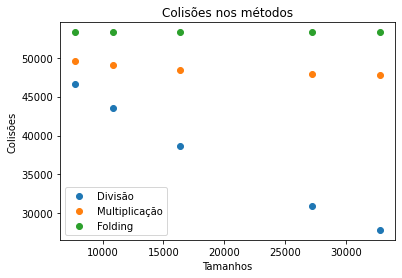

[53279, 53279, 53279, 53279, 53279]
[10876, 7759, 27191, 32749, 16384]


In [23]:
#TENTATIVA ADEMIR 

colis_Div = [TDiv1.qtdColisoes, TDiv2.qtdColisoes, TDiv3.qtdColisoes, TDiv4.qtdColisoes,
             TDiv5.qtdColisoes]
colis_Mult = [TMult1.qtdColisoes, TMult2.qtdColisoes, TMult3.qtdColisoes, TMult4.qtdColisoes,
              TMult5.qtdColisoes]
colis_Fold = [TFond1.qtdColisoes, TFond2.qtdColisoes, TFond3.qtdColisoes, TFond4.qtdColisoes,
              TFond5.qtdColisoes]
tamanhos = [tam1, tam2, tam3, tam4, tam5]

plt.scatter(tamanhos, colis_Div, label = 'Divisão')
plt.scatter(tamanhos, colis_Mult, label = 'Multiplicação')
plt.scatter(tamanhos, colis_Fold, label = 'Folding')

plt.legend()
plt.xlabel('Tamanhos')
plt.ylabel('Colisões')
plt.title('Colisões nos métodos')
plt.show()

print(colis_Fold)
print(tamanhos)

In [24]:
dic={"Tamanho":tamanhos,"Funcão Divisão Colisões":colis_Div,"Função Multiplicação Colisões":colis_Mult,"Função Folding Colisões":colis_Fold}
tabela=pd.DataFrame(dic)
tabela

,Tamanho,Funcão Divisão Colisões,Função Multiplicação Colisões,Função Folding Colisões
0,10876,43577,49014,53279
1,7759,46630,49632,53279
2,27191,30880,47954,53279
3,32749,27860,47815,53279
4,16384,38611,48410,53279


# Teoria

### Nesse trabalho concluirmos que a técnica de hash é eficaz pois permite que operações básicas de dicionário sejam realizadas em tempo médio de O(1).

### As tabelas de espalhamento surge para evitar o desperdício de memória, em oposição as de endereço direto quando a quantidade de chaves armazenadas é muito menor que as possíveis. Porém, ela apresenta a situação de conflitos entres chaves com índices iguais gerados por funções  hash

# Método da divisão

### h(k) = k mod m

### O método só exige uma operação, então é bastante rápido

### M é crítico para as colisões, precisa ser primo e longe de uma potência de 2. Definimos uma forma de escolher o número

# Método da multiplicação

### h(k)=[m(k*A mod 1)]

### Aqui o valor de M pode assumir uma potência de 2, não é critico em M, mas a escolha de A funciona melhor com alguns valores do que outros.

# Método de Folding
### O método de folding usa a divisão de cada chave em pedaços de mesmo tamanho. Esses pedaços são somados para então gerar o valor de espalhamento resultante.
